In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


In [1]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
def create_cnn_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        
        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [2]:

# Instantiate and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/10
782/782 [==============================] - 22s 27ms/step - loss: 1.5584 - accuracy: 0.4299 - val_loss: 1.3535 - val_accuracy: 0.5136
Epoch 2/10
782/782 [==============================] - 22s 29ms/step - loss: 1.2195 - accuracy: 0.5652 - val_loss: 1.1371 - val_accuracy: 0.5929
Epoch 3/10
782/782 [==============================] - 22s 28ms/step - loss: 1.0568 - accuracy: 0.6273 - val_loss: 1.0126 - val_accuracy: 0.6413
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.9509 - accuracy: 0.6683 - val_loss: 0.9489 - val_accuracy: 0.6636
Epoch 5/10
782/782 [==============================] - 22s 28ms/step - loss: 0.8697 - accuracy: 0.6985 - val_loss: 0.9063 - val_accuracy: 0.6860
Epoch 6/10
782/782 [==============================] - 22s 28ms/step - loss: 0.8149 - accuracy: 0.7168 - val_loss: 0.8796 - val_accuracy: 0.6959
Epoch 7/10
782/782 [==============================] - 22s 28ms/step - loss: 0.7658 - accuracy: 0.7333 - val_loss: 0.9226 - val_accuracy:

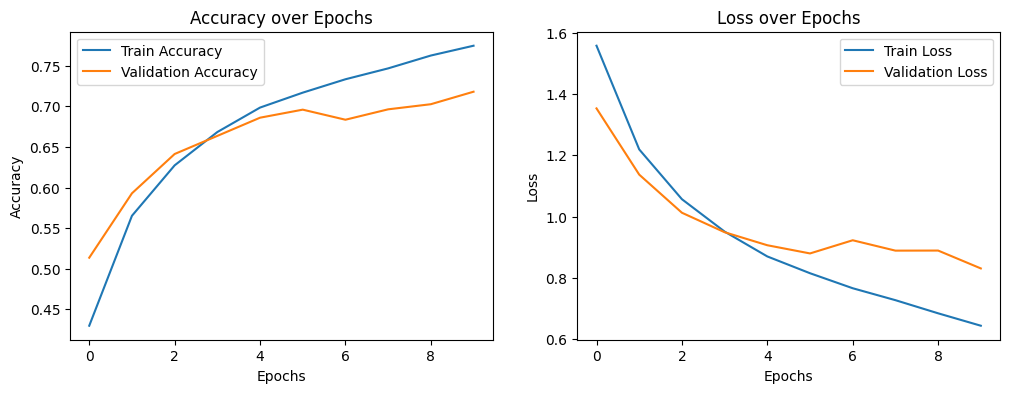

In [3]:

# Function to plot loss and accuracy
def plot_performance(history):
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')
    
    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')
    
    plt.show()

# Call the plotting function
plot_performance(history)
